In [1]:
# !pip install yt-dlp

### Sources:

https://github.com/teticio/audio-diffusion/blob/main/audiodiffusion/mel.py#L92

In [2]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
from data.yt_audio_downloader import AudioDownloader
from data.audio_processor import AudioPreprocessor

In [3]:
# Initialize downloader
downloader = AudioDownloader(output_path='downloads', codec='mp3')

# Download single video
youtube_url = 'https://www.youtube.com/watch?v=hQncT4Hswhw'
audio_file = downloader.download_audio(youtube_url)
print(f"Downloaded audio file: {audio_file}")

[youtube] Extracting URL: https://www.youtube.com/watch?v=hQncT4Hswhw
[youtube] hQncT4Hswhw: Downloading webpage
[youtube] hQncT4Hswhw: Downloading tv client config
[youtube] hQncT4Hswhw: Downloading player c8dbda2a
[youtube] hQncT4Hswhw: Downloading tv player API JSON
[youtube] hQncT4Hswhw: Downloading ios player API JSON
[youtube] hQncT4Hswhw: Downloading m3u8 information
[info] hQncT4Hswhw: Downloading 1 format(s): 251
[download] Destination: downloads/Piano Solo - Calm Piano Music (Luke Faulkner).webm
[download] 100% of   54.00MiB in 00:00:02 at 23.09MiB/s    
[ExtractAudio] Destination: downloads/Piano Solo - Calm Piano Music (Luke Faulkner).mp3
Deleting original file downloads/Piano Solo - Calm Piano Music (Luke Faulkner).webm (pass -k to keep)
Downloaded audio file: downloads/Piano Solo - Calm Piano Music (Luke Faulkner).mp3


In [5]:
# Download multiple videos from file
downloaded_files = downloader.download_from_file('data/youtube_urls.txt')
print(f"\nTotal files downloaded: {len(downloaded_files)}")

[youtube] Extracting URL: https://www.youtube.com/watch?v=hQncT4Hswhw
[youtube] hQncT4Hswhw: Downloading webpage
[youtube] hQncT4Hswhw: Downloading tv client config
[youtube] hQncT4Hswhw: Downloading player c8dbda2a
[youtube] hQncT4Hswhw: Downloading tv player API JSON
[youtube] hQncT4Hswhw: Downloading ios player API JSON
[youtube] hQncT4Hswhw: Downloading m3u8 information
[info] hQncT4Hswhw: Downloading 1 format(s): 251
[download] Destination: downloads/Piano Solo - Calm Piano Music (Luke Faulkner).webm
[download] 100% of   54.00MiB in 00:00:02 at 23.02MiB/s    
[ExtractAudio] Destination: downloads/Piano Solo - Calm Piano Music (Luke Faulkner).mp3
Deleting original file downloads/Piano Solo - Calm Piano Music (Luke Faulkner).webm (pass -k to keep)
Successfully downloaded: https://www.youtube.com/watch?v=hQncT4Hswhw -> downloads/Piano Solo - Calm Piano Music (Luke Faulkner).mp3

Total files downloaded: 1


In [6]:
# Initialize preprocessor
preprocessor = AudioPreprocessor(target_sr=22050)

# Process a single audio file
audio, sr = preprocessor.load_audio(audio_file)
print(f"Loaded audio with sample rate: {sr} Hz")

# Preprocess the audio
audio = preprocessor.trim_silence(audio, top_db=20)
audio = preprocessor.normalize_audio(audio)

Loaded audio with sample rate: 22050 Hz


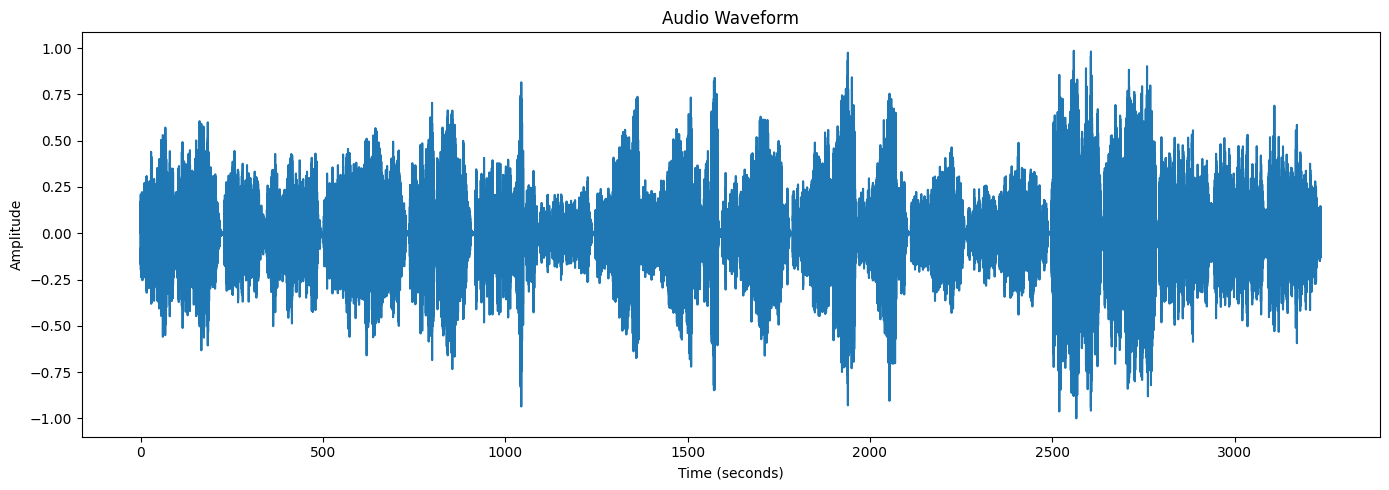

In [7]:
# Visualize the audio waveform
preprocessor.plot_audio(audio, sr)

In [8]:
# Extract and save features
features = preprocessor.extract_features(audio, sr)
print("Extracted features shape:", features.shape)

# Save features
np.save('features.npy', features)
print("Features saved to features.npy")

Extracted features shape: (128, 139404)
Features saved to features.npy


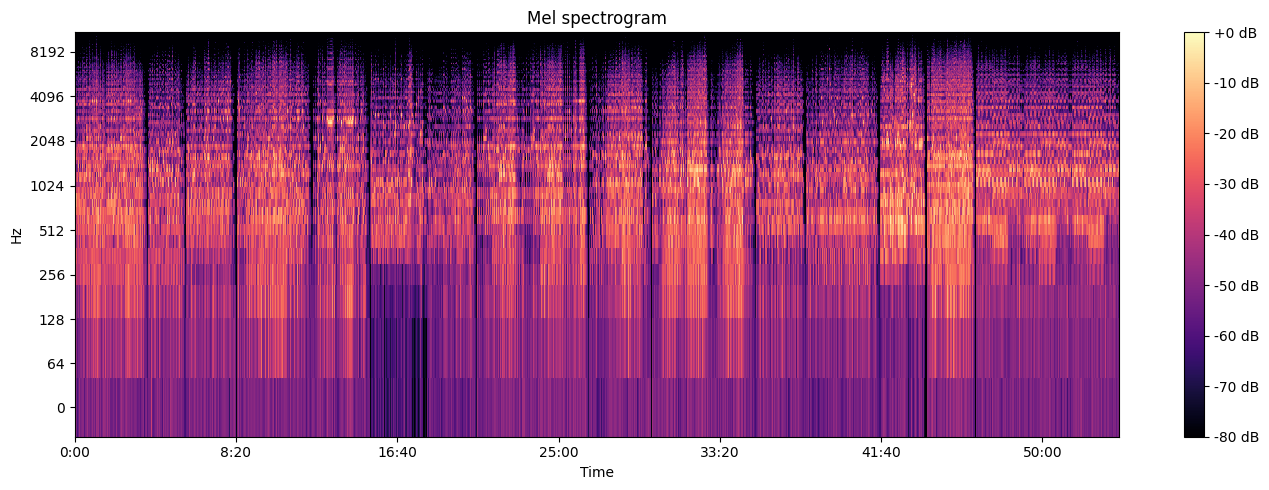

In [10]:
# plot mel spectrogram
preprocessor.plot_mel_spectrogram(features)